In [1]:
import os, glob, math, operator
import ROOT as ROOT
from ROOT import TCanvas, TColor, TGaxis, TH1F, TPad, TFile, TGraphAsymmErrors,TLatex,TLine,gStyle,TLegend,gROOT,TGraph
from ROOT import kBlack, kBlue, kRed
from array import array
import matplotlib.pyplot as plt, numpy as np
from matplotlib import text
from matplotlib.colors import LogNorm
import datetime
import pandas as pd 

def SetCanvas():
    c = ROOT.TCanvas("myCanvasName", "The Canvas Title", 650, 600)
    c.SetBottomMargin(0.050)
    c.SetRightMargin(0.050)
    c.SetLeftMargin(0.050)
    c.SetTopMargin(0.050)
    return c

def SetCMSAxis(h, xoffset=1., yoffset=1.):
    h.GetXaxis().SetTitleSize(0.047)
    h.GetYaxis().SetTitleSize(0.047)
    if type(h) is ( (not ROOT.TGraphAsymmErrors) or (not ROOT.TGraph)):
        h.GetZaxis().SetTitleSize(0.047)

    h.GetXaxis().SetLabelSize(0.047)
    h.GetYaxis().SetLabelSize(0.047)
    if type(h) is ( (not ROOT.TGraphAsymmErrors) or (not ROOT.TGraph)):
        h.GetZaxis().SetLabelSize(0.047)

    h.GetXaxis().SetTitleOffset(xoffset)
    h.GetYaxis().SetTitleOffset(yoffset)
    
    h.GetYaxis().CenterTitle()
    return h

def SetLegend(coordinate_=[.50,.65,.90,.90],ncol=2):
    c_=coordinate_
    legend=ROOT.TLegend(c_[0], c_[1],c_[2],c_[3])
    legend.SetBorderSize(0)
    legend.SetNColumns(ncol)
    legend.SetLineColor(1)
    legend.SetLineStyle(1)
    legend.SetLineWidth(1)
    legend.SetFillColor(0)
    legend.SetFillStyle(0)
    legend.SetTextFont(42)
    legend.SetTextSize(0.035)
    return legend


def drawenergy1D(is2017, text_="Work in progress 2018", data=True):
    #pt = ROOT.TPaveText(0.0877181,0.9,0.9580537,0.96,"brNDC")
    pt = ROOT.TPaveText(0.0997181,0.95,0.9580537,0.96,"brNDC")
    pt.SetBorderSize(0)
    pt.SetTextAlign(12)
    pt.SetFillStyle(0)
    pt.SetTextFont(52)

    cmstextSize = 0.07
    preliminarytextfize = cmstextSize * 0.7
    lumitextsize = cmstextSize *0.7
    pt.SetTextSize(cmstextSize)
    text = pt.AddText(0.03,0.57,"#font[60]{CMS}")

    #pt1 = ROOT.TPaveText(0.0877181,0.9,0.9580537,0.96,"brNDC")
    pt1 = ROOT.TPaveText(0.0877181,0.95,0.9580537,0.96,"brNDC")
    pt1.SetBorderSize(0)
    pt1.SetTextAlign(12)
    pt1.SetFillStyle(0)
    pt1.SetTextFont(52)

    pt1.SetTextSize(preliminarytextfize)
    #text1 = pt1.AddText(0.215,0.4,text_)
    text1 = pt1.AddText(0.15,0.4,text_)

    #pt2 = ROOT.TPaveText(0.0877181,0.9,0.9580537,0.96,"brNDC")
    pt2 = ROOT.TPaveText(0.0997181,0.95,0.9580537,0.96,"brNDC")
    pt2.SetBorderSize(0)
    pt2.SetTextAlign(12)
    pt2.SetFillStyle(0)
    pt2.SetTextFont(52)
    pt2.SetTextFont(42)
    pt2.SetTextSize(lumitextsize)

    pavetext = ''
    if is2017 and data: pavetext = str(luminosity_)+' fb^{-1}'+"(13 TeV)"
    if (not is2017) and data: pavetext = str(luminosity_)+' fb^{-1}'+"(13 TeV)"

    if is2017 and not data: pavetext = "13 TeV"
    if (not is2017) and not data: pavetext = "13 TeV"

    if data: text3 = pt2.AddText(0.68,0.5,pavetext)
    if not data: text3 = pt2.AddText(0.85,0.5,pavetext)

    return [pt,pt1,pt2]

def getLatex():
    latex =  TLatex()
    latex.SetNDC();
    latex.SetTextSize(0.04);
    latex.SetTextAlign(31);
    latex.SetTextAlign(11);
    latex.SetTextColor(1);
    return latex


def ExtraText(text_, x_, y_):
    if not text_:
        print("nothing provided as text to ExtraText, function crashing")
    ltx = ROOT.TLatex(x_, y_, text_)

    if len(text_) > 0:
        ltx.SetTextFont(42)
        ltx.SetTextSize(0.049)
        #ltx.Draw(x_,y_,text_)
        ltx.Draw('same')
    return ltx


def getGraph(n,x,y,lc,mc,ms):
    gr =TGraph(n,x,y)
    gr.SetFillColor(4)
    #gr.SetFillStyle(3004)
    gr.SetLineColor(4)
    gr.SetLineWidth(2)
    gr.SetMarkerStyle(ms)
    gr.SetMarkerSize(1.5)
    gr.SetLineColor(lc)
    gr.SetLineWidth(1)
    gr.SetMarkerColor(mc)
    gr.GetYaxis().SetTitle("Signal Efficiency")
    gr.GetXaxis().SetTitle("M_{a} (GeV)")
    return gr
    
def getHisto(hist,ls,lc,mc,ms):
    gr = hist#.Clone('gr')
    gr.SetLineStyle(ls)
    gr.SetLineWidth(2)
    gr.SetMarkerStyle(ms)
    gr.SetMarkerSize(1)
    gr.SetLineColor(lc)
    gr.SetMarkerColor(mc)
    return gr

def setRebin(h_temp2,newname,bin):
    h_temp = h_temp2.Rebin(bin)
    h_temp.SetName(newname)
    h_temp.SetTitle(newname)
    return h_temp

def bins_list(n_reg,firstBin,bdiff=[50,100,150,450]):
    bin_list = [firstBin, ]
    bin_val = firstBin
    for i in range(n_reg):
        for j in bdiff:
            bin_val+=j
            bin_list.append(bin_val)
    return bin_list

datestr = str(datetime.date.today().strftime("%d%m%Y"))

Welcome to JupyROOT 6.22/08


In [2]:
# ROOT.gStyle.SetErrorX(0.5)
ROOT.gStyle.SetFrameLineWidth(3)
ROOT.gStyle.SetOptTitle(0)
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetLegendBorderSize(0)
ROOT.gROOT.ForceStyle(1)

in_dir = '/Users/ptiwari/cernBox/Documents/ExoPieCapper/plots_norm/v17_12-00-02/bbDMRoot'
region = ['SR','ZmumuCR','ZeeCR','TopmunuCR','TopenuCR','WmunuCR','WenuCR']
contribution = ['data_obs','DIBOSON','ZJets','GJets','QCD','SMH','STop','Top','WJets','DYJets']
leg_entry = {'DIBOSON':'WW/WZ/ZZ','ZJets':'Z(#nu#nu)+jets','GJets':'#gamma+jets','QCD':'QCD','SMH':'SMH','STop':'Single t','Top':'t#bar{t}','WJets':'W(l#nu)+jets','DYJets':'Z(ll)+jets','data_obs':'Data'}

label_entry = {'SR':'SR','ZmumuCR':'Z#mu#mu','ZeeCR':'Zee','TopmunuCR':'t#bar{t}(#mu#nu)','TopenuCR':'t#bar{t}(e#nu)','WmunuCR':'W#mu#nu','WenuCR':'We#nu'}

hist_color = {'DIBOSON':ROOT.kBlue+1,'ZJets':ROOT.kAzure-4,'GJets':ROOT.kCyan-8,'QCD':ROOT.kGray+2,'SMH':ROOT.kRed-1,'STop':ROOT.kOrange+2,'Top':ROOT.kOrange-1,'WJets':ROOT.kViolet-2,'DYJets':ROOT.kGreen+1,'data_obs':ROOT.kBlack}

cat= '2b'
in_files = {}
for reg in region:
    if 'SR' in reg:
        in_files.update({reg:TFile(in_dir+'/h_reg_'+reg+'_'+cat+'_MET.root')})
    else:
        in_files.update({reg:TFile(in_dir+'/h_reg_'+reg+'_'+cat+'_Recoil.root')})

contri={}
for cont in contribution:
    f_dict = {}
    for f_key in in_files:
        f_dict.update({f_key:in_files[f_key].Get(cont).Integral()})
    contri.update({cont:f_dict})
    
# print(contri)    
contri_err={}    
for cont in contribution:
    f_dict = {}
    for f_key in in_files:
        hist_in = in_files[f_key].Get(cont)
        hist_in = setRebin(hist_in,cont+'err',hist_in.GetNbinsX())
        f_dict.update({f_key:hist_in.GetBinError(1)})
    contri_err.update({cont:f_dict})
# print(contri_err)

In [3]:
# luminosity_ = '{0:.2f}'.format(35.82)
luminosity_ = '{0:.2f}'.format(41.50)
# luminosity_ = '{0:.2f}'.format(59.64)
hist_ = {}
for cont in contribution:
    hist_.update({cont:TH1F(cont+'_','CRSummaryplot',7,0,7)})
    i=1
    f_dict= contri[cont]
    f_dict_err = contri_err[cont]
    for key in f_dict:
        hist_[cont].SetBinContent(i, f_dict[key])
        hist_[cont].SetBinError(i, f_dict_err[key])
        # print(key, f_dict_err[key])
        hist_[cont].GetXaxis().SetBinLabel(i, str(label_entry[key]))
        i+=1

Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created
Info in <TCanvas::Print>: pdf file CRSummary_2017_2b_14042021.pdf has been created
Info in <TCanvas::Print>: png file CRSummary_2017_2b_14042021.png has been created


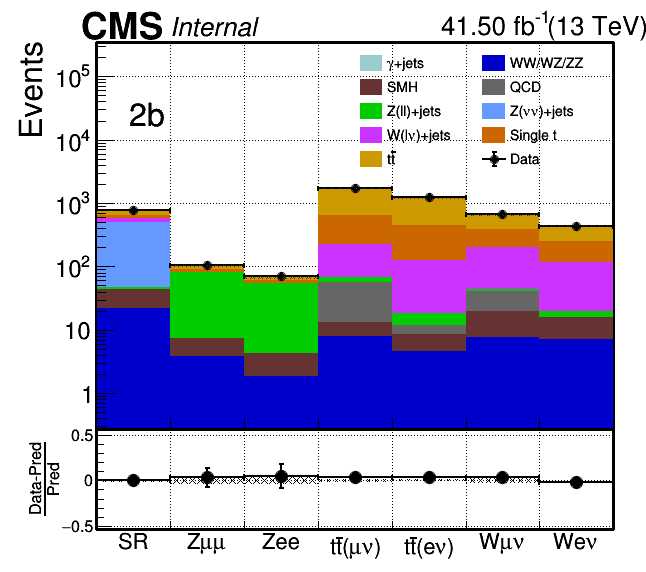

In [4]:
c1 = SetCanvas()
c1.cd()
##Upper PAD##
c1_1 = ROOT.TPad("c1_1", "c1_1", 0., 0.25, 1., 1.)
c1_1.SetBottomMargin(0.0)
c1_1.SetTopMargin(0.10)
c1_1.SetLeftMargin(0.15)
c1_1.SetRightMargin(0.05)
c1_1.SetLogy(1)
c1_1.SetGrid()
c1_1.Draw()
c1_1.cd()
legend = SetLegend([.55,.60,.95,.88],ncol=2)
hs=ROOT.THStack('hs','CR Summary ')
hist_unsorted = {}
for key in hist_:
    hist_unsorted.update({key:hist_[key].Integral()})
hist_sorted = dict(sorted(hist_unsorted.items(), key=lambda item: item[1]))
for key in hist_sorted:
    if not 'data_obs' in key and hist_sorted[key]>0:
        leg_sty = "f"
        hist_[key].SetFillColor(hist_color[key])
        hist_[key].SetLineWidth(0)
        hs.Add(hist_[key])
        legend.AddEntry(hist_[key],leg_entry[key],leg_sty)
Stackhist = hs.GetStack().Last()
hs.SetMaximum(hs.GetMaximum()*100)
hs.SetMinimum(1)
hs.Draw('HIST')
hs.GetYaxis().SetLabelSize(0.06)
hs.GetYaxis().SetTitleSize(0.08)
hs.GetYaxis().SetTitleOffset(0.8)
c1_1.Modified()
hs.GetYaxis().SetTitle("Events")
h_data = hist_['data_obs']
h_data.Sumw2()
h_data.SetLineColor(1)
h_data.SetLineWidth(2)
h_data.SetMarkerSize(1.2)
h_data.SetMarkerStyle(20)
h_data = SetCMSAxis(h_data)
legend.AddEntry(h_data,leg_entry['data_obs'],'PEL')
h_data.Draw("same p e1")
h_err = Stackhist.Clone("h_err")
h_err.Sumw2()
h_err.SetFillColor(ROOT.kGray+3)
h_err.SetLineColor(ROOT.kGray+3)
h_err.SetMarkerSize(0)
h_err.SetFillStyle(3013)
h_err.Draw("same E2")
legend.Draw("same")
c1_1.Update()
c1.cd()
##Lower PAD##
c1_2 = ROOT.TPad("c1_2", "c1_2", 0., 0., 1., 0.25)
c1_2.SetLeftMargin(0.15)
c1_2.SetRightMargin(0.05)
c1_2.SetTopMargin(0.00)
c1_2.SetBottomMargin(0.30)
c1_2.SetGrid()
c1_2.Draw()
c1_2.cd()
DataMC = h_data.Clone()
DataMC.Add(Stackhist, -1)   # remove for data/mc
DataMC.Divide(Stackhist)
DataMC.GetYaxis().SetTitle("#frac{Data-Pred}{Pred}")
DataMC.GetYaxis().SetTitleSize(0.12)
DataMC.GetYaxis().SetTitleOffset(0.42)
DataMC.GetYaxis().SetTitleFont(42)
DataMC.GetYaxis().SetLabelSize(0.12)
DataMC.GetYaxis().CenterTitle()
DataMC.GetXaxis().SetLabelSize(0.25)
DataMC.GetXaxis().SetTitleSize(0.16)
DataMC.GetXaxis().SetLabelOffset(0.01)
DataMC.GetXaxis().SetTitleFont(42)
DataMC.GetXaxis().SetTickLength(0.07)
DataMC.GetXaxis().SetLabelFont(42)
DataMC.GetYaxis().SetLabelFont(42)
DataMC.GetYaxis().SetNdivisions(505)
DataMC.SetMarkerSize(1.5)
DataMC.SetMarkerStyle(20)
DataMC.SetMarkerColor(1)
DataMC.SetMinimum(-.53)
DataMC.SetMaximum(0.57)
DataMC.Draw("P e1")
ratioerr = h_err.Clone("ratioerr")
ratioerr.Sumw2()
ratioerr.SetStats(0)
ratioerr.SetMinimum(0)
ratioerr.SetMarkerSize(0)
ratioerr.SetFillColor(ROOT.kBlack)
ratioerr.SetFillStyle(3013)
for i in range(h_err.GetNbinsX()):
    binerror = 0.0
    ratioerr.SetBinContent(i, 0.0)
    if (h_err.GetBinContent(i) > 1e-6):
        binerror = h_err.GetBinError(i)
        ratioerr.SetBinError(i, binerror/h_err.GetBinContent(i))
    else:
        ratioerr.SetBinError(i, 999.)
ratioerr.Draw("e2 same")   
c1_2.Update()
c1.cd()
t2d = ExtraText(str(cat), 0.20, 0.80)
t2d.SetTextSize(0.06)
t2d.SetTextAlign(12)
t2d.SetNDC(ROOT.kTRUE)
t2d.SetTextFont(42)
t2d.Draw("same")
pt = drawenergy1D(True,text_="    Internal",data=True)
for ipt in pt: ipt.Draw()
latex=getLatex()
c1.Update()
c1.SaveAs("CRSummary_2017_"+cat+"_"+datestr+".pdf")
c1.SaveAs("CRSummary_2017_"+cat+"_"+datestr+".png")
c1.Draw()